In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 

In [2]:
df = pd.read_csv('sensordata_14days.csv')

In [3]:
df.head()

,created,temperature,humidity,co,h2s,no2,sgp30_tvoc,sgp30_co2,nh3,pm_mass_1_0,pm_mass_2_5,pm_mass_4_0,pm_mass_10,pm_number_0_5,pm_number_1_0,pm_number_2_5,pm_number_4_0,pm_number_10,led_status
0,2020-12-08 13:57,24.971582,15.211340,3939,'-89,140,156,400,40.303032,8.614122,9.176517,9.231077,9.241991,58.750530,68.410507,68.743607,68.777206,68.790810,0
1,2020-12-08 13:47,25.073460,15.339204,3543,'-99,143,184,400,42.424244,8.496529,9.026461,9.060221,9.066971,58.000744,67.501152,67.806778,67.835884,67.848625,0
2,2020-12-08 13:27,25.832174,17.224588,'-2322,'-100,146,471,461,42.424244,7.570829,8.005866,8.005877,8.005871,51.759861,60.183670,60.421619,60.441505,60.451847,0
3,2020-12-08 13:17,25.896517,18.639967,'-1618,'-27,137,512,587,43.939396,6.356033,6.721264,6.721273,6.721269,43.454605,50.526749,50.726517,50.743214,50.751896,0
4,2020-12-08 12:47,25.521181,18.531834,'-1510,32,152,584,709,40.000000,7.586081,8.022079,8.022157,8.022173,51.863956,60.304825,60.543339,60.563274,60.573647,0


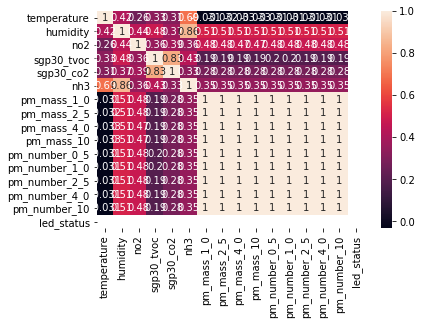

In [4]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
df = df [['temperature', 'humidity', 'co', 'h2s', 'no2', 'sgp30_tvoc', 'sgp30_co2']]

In [6]:
df.head()

,temperature,humidity,co,h2s,no2,sgp30_tvoc,sgp30_co2
0,24.971582,15.211340,3939,'-89,140,156,400
1,25.073460,15.339204,3543,'-99,143,184,400
2,25.832174,17.224588,'-2322,'-100,146,471,461
3,25.896517,18.639967,'-1618,'-27,137,512,587
4,25.521181,18.531834,'-1510,32,152,584,709


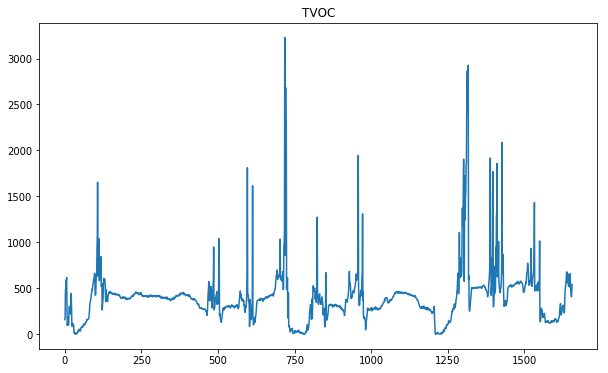

In [7]:
df['sgp30_tvoc'].plot(figsize=(10,6))
plt.title('TVOC')
plt.show()

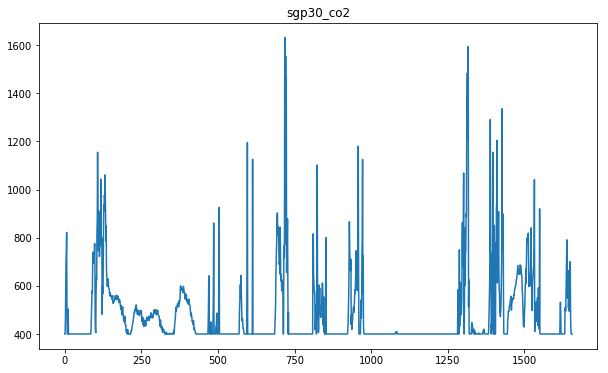

In [8]:
df['sgp30_co2'].plot(figsize=(10,6))
plt.title('sgp30_co2')
plt.show()

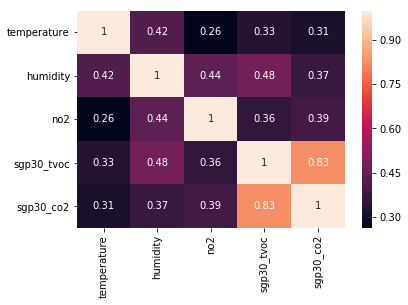

In [9]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import numpy as np
from scipy import stats


In [11]:
a= np.array(df['sgp30_tvoc'])
b= np.array(df['sgp30_co2'])
print(stats.entropy([0.5,0.5])) # entropy of 0.69, expressed in nats
print(mutual_info_classif(a.reshape(-1,1), b, discrete_features = True)) # mutual information of 0.69, expressed in nats
print(mutual_info_score(a,b)) 

0.6931471805599453
[2.45927517]
2.4592751654698497


In [16]:
a= np.array(df['temperature'])
b= np.array(df['no2'])
print(stats.entropy([0.5,0.5])) # entropy of 0.69, expressed in nats
print(mutual_info_classif(a.reshape(-1,1), b, discrete_features = True)) # mutual information of 0.69, expressed in nats
print(mutual_info_score(a,b)) 

0.6931471805599453
[2.02893266]
2.0289326617707353


Text(0,0.5,'Frequency Domain (Spectrum) Magnitude')

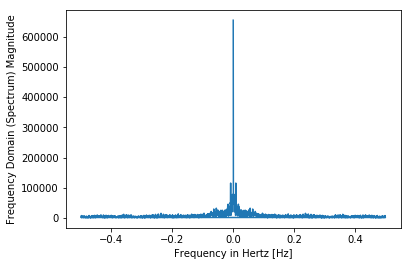

In [12]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

f = 10  
f_s = 1  # Sampling rate, or number of measurements per second

x = df['sgp30_tvoc']
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s


plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')

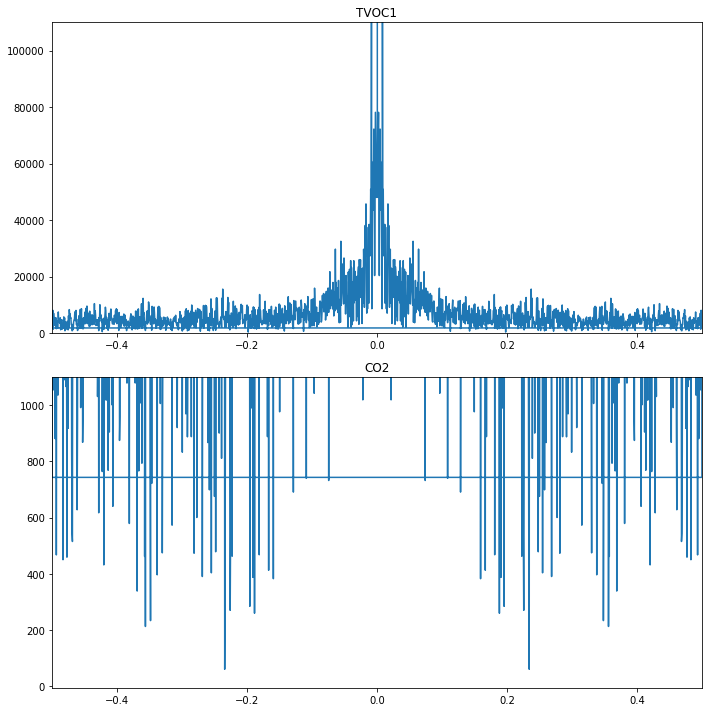

In [13]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

f = 10
f_s = 1  # Sampling rate, or number of measurements per second

x1 = df['sgp30_tvoc']
X1 = fftpack.fft(x1)
freqs1 = fftpack.fftfreq(len(x1)) * f_s

x2 = df['sgp30_co2']
X2 = fftpack.fft(x2)
freqs2 = fftpack.fftfreq(len(x2)) * f_s

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.subplot(211)
plt.plot(freqs, np.abs(X1))
plt.title('TVOC1')
plt.xlim([-f_s / 2, f_s / 2])
plt.ylim(-5, 110000)

plt.subplot(212)

plt.plot(freqs, np.abs(X2))
plt.title('CO2')
plt.xlim([-f_s / 2, f_s / 2])
plt.ylim([-5, 1100])

plt.tight_layout()
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
x1 = df[['sgp30_tvoc']]
x_pca = pca.fit_transform(x1)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0
0,-238.798431
1,-210.798431
2,76.201569
3,117.201569
4,189.201569


In [15]:
from sklearn.decomposition import PCA
pca = PCA()
x1 = df[['sgp30_co2']]
x_pca = pca.fit_transform(x1)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0
0,-79.652987
1,-79.652987
2,-18.652987
3,107.347013
4,229.347013
